In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_points = data.data
# data_points = np.array(data)
y = data.target


In [ ]:
# Initializing K centroids from data points. We pick random data_points
# as the centroids

def initialize(k, data_points):
  # initializing centroids
  m = len(data_points)
  n = len(data_points[0])
  centroids = data_points[np.random.choice(range(m), k, replace=False)]
  return centroids


In [ ]:
def find_nearest(x, centroids, k):
    # Finding closest centroid for a data point
    distances = np.empty(k)
    for i in range(k):
        distances[i] = np.linalg.norm(centroids[i] - x)
    return np.argmin(distances)

In [ ]:
def clustering(centroids, k, data_points):
    # cluster number assigned to each data point
    n = data_points.shape[0]
    cluster_assign = np.empty(n)
    for i in range(n):
        cluster_assign[i] = find_nearest(data_points[i], centroids, k)
    return cluster_assign



In [ ]:
def meanfunction(cluster_assign, K, data_points):
    m = data_points.shape[1]
    centroids = np.empty((K, m))
    for i in range(K):
        points = data_points[cluster_assign == i] # gather points for the cluster i
        centroids[i] = np.mean(points, axis=0) # use axis=0 to compute means across points
    return centroids

In [ ]:
def kmeans(K, data_points, trials = 300):
    # initialize random centroids
    centroids = initialize(K, data_points)
    # loop till max_iterations or convergance
    for j in range(trials):
        # create clusters and compute mean
        clusters = clustering(centroids, K, data_points)
        previous = centroids
        centroids = meanfunction(clusters, K, data_points)
        # break loop if no more change
        delta = previous - centroids
        if np.all(delta == 0):
            return clusters, centroids
    return clusters, centroids

In [ ]:

def calculate_distortion(clusters, centroids, data_points):

    k = len(centroids)
    distortion = 0

    for i in range(k):

      # All points in one cluster collected, distance calculated
      cluster_points = data_points[clusters == i]
      squared_distances = np.sum((cluster_points - centroids[i])**2, axis=1)
      distortion += np.sum(squared_distances)

    return distortion






In [ ]:
distortion_array = []
for i in range(2,8):
  clusters, centroids = kmeans(i, data_points, trials = 500)
  distortion = calculate_distortion(clusters, centroids, data_points)
  distortion_array.append(distortion)


In [ ]:
distortion_array

[77943099.87829883,
 50517769.55928191,
 29226541.65197979,
 20672701.39435882,
 17054794.297389243,
 13353341.346502563]

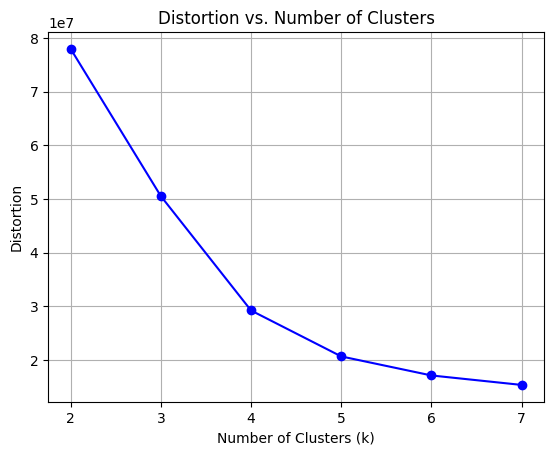

In [ ]:
# Create x-axis values ranging from 2 to 7
x_values = np.arange(2, 8)

# Plot the distortion values against the x-axis
plt.plot(x_values, distortion_array, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Distortion vs. Number of Clusters')
plt.grid(True)
plt.show()